<a href="https://colab.research.google.com/github/david6070/py/blob/master/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# =============================================================================
# **MScFE 600: Financial Data - Group Work Project #1**
# **Task 2: Yield Curve Modeling for Vietnam (Comprehensive Analysis)**
#
# This script implements and visualizes yield curve modeling for Vietnamese Government, securities, mirroring the structure of a detailed analytical notebook.
#
# Models Used:
# 1. **Nelson-Siegel Model**
# 2. **Cubic-Spline Model**
#
# **Objectives**:
# - Generate a plausible Vietnamese government bond curve, anchored by a recent 10Y yield.
# - Print detailed tables for model comparison and interpretation.
# - Visualize the initial raw yield curve and model fits.
# =============================================================================



#Import Necessary Libraries

In [18]:
# --- Import Necessary Libraries ---
# Import libraries for numerical operations, plotting, optimization, and data fetching.
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

#Data Preparation for Vietnam

Using an anchored 10-Year Vietnamese Government Bond yield of: 2.80%

Generated plausible yield curve for Vietnam:
  - Maturity: 0.25 years, Yield: 2.20%
  - Maturity: 0.5  years, Yield: 2.30%
  - Maturity: 1.0  years, Yield: 2.40%
  - Maturity: 2.0  years, Yield: 2.50%
  - Maturity: 3.0  years, Yield: 2.60%
  - Maturity: 5.0  years, Yield: 2.70%
  - Maturity: 7.0  years, Yield: 2.75%
  - Maturity: 10.0 years, Yield: 2.80%
  - Maturity: 15.0 years, Yield: 3.00%
  - Maturity: 20.0 years, Yield: 3.10%
  - Maturity: 30.0 years, Yield: 3.20%

Displaying initial raw yield curve plot for Vietnam...


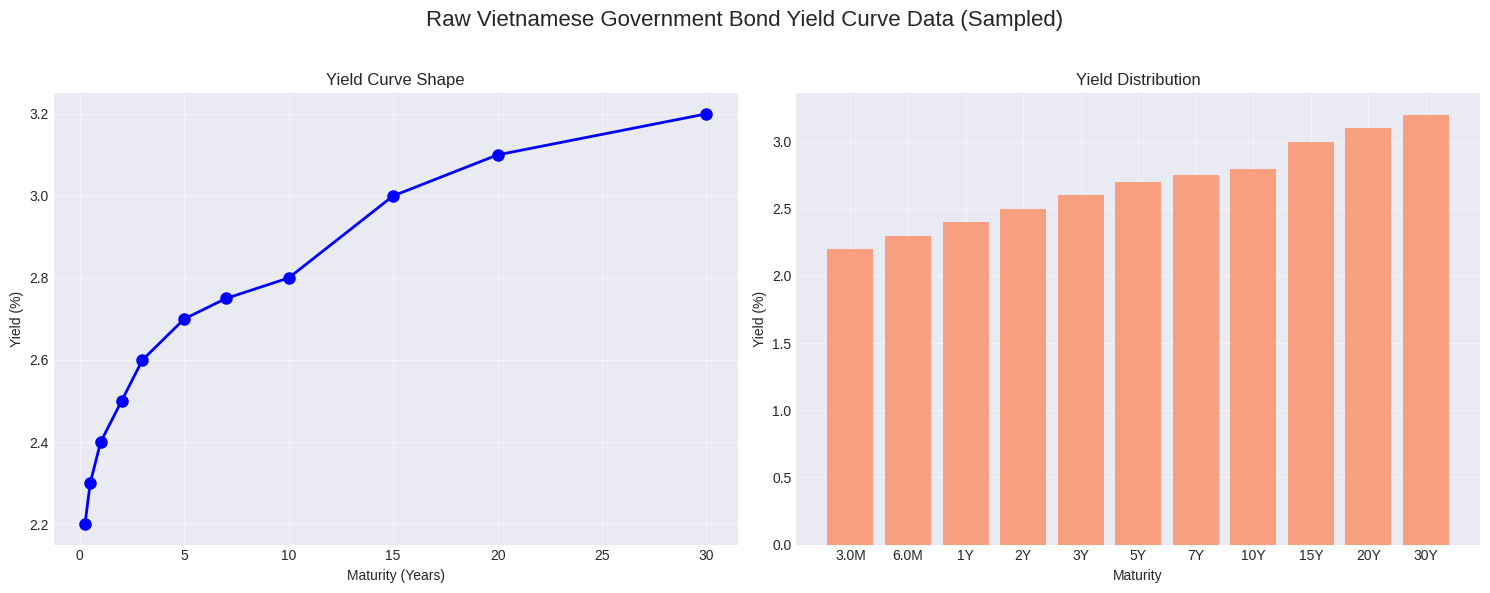

In [19]:
# --- 1. Data Preparation for Vietnam ---
# In this section, we generate a plausible yield curve for Vietnam.
# We anchor the curve using a recent, plausible 10-year bond yield.

# A recent plausible 10-year government bond yield for Vietnam is approx. 2.8%.
base_yield = 2.8
print(f"Using an anchored 10-Year Vietnamese Government Bond yield of: {base_yield:.2f}%")

# Define a set of standard maturities for the yield curve.
maturities = np.array([0.25, 0.5, 1, 2, 3, 5, 7, 10, 15, 20, 30])

# Generate a plausible, upward-sloping yield curve around the 10-year base yield.
# These spreads are representative of a normal yield curve shape.
yield_spreads = np.array([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.05, 0.0, 0.2, 0.3, 0.4])
yields = base_yield + yield_spreads

print("\nGenerated plausible yield curve for Vietnam:")
for m, y in zip(maturities, yields):
    print(f"  - Maturity: {m:<4} years, Yield: {y:.2f}%")


# --- 1.1. Initial Data Visualization ---
print("\nDisplaying initial raw yield curve plot for Vietnam...")
plt.style.use('seaborn-v0_8-darkgrid')
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig1.suptitle('Raw Vietnamese Government Bond Yield Curve Data (Sampled)', fontsize=16)

ax1.plot(maturities, yields, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Maturity (Years)')
ax1.set_ylabel('Yield (%)')
ax1.set_title('Yield Curve Shape')
ax1.grid(True, alpha=0.5)

ax2.bar([f'{m*12:.1f}M' if m < 1 else f'{m:.0f}Y' for m in maturities], yields, alpha=0.7, color='coral')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Yield (%)')
ax2.set_title('Yield Distribution')
ax2.grid(True, alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("raw_yield_curve_vietnam.png")
plt.show()


#Nelson-Siegel Model Implementation

In [20]:

# --- 2. Nelson-Siegel Model Implementation ---
def nelson_siegel(t, beta0, beta1, beta2, tau):
    t_safe = t + 1e-8
    term1 = (1 - np.exp(-t_safe / tau)) / (t_safe / tau)
    term2 = term1 - np.exp(-t_safe / tau)
    return beta0 + beta1 * term1 + beta2 * term2

def objective_function(params, maturities, yields):
    beta0, beta1, beta2, tau = params
    if tau <= 0: return np.inf
    model_yields = nelson_siegel(maturities, beta0, beta1, beta2, tau)
    return np.sum((yields - model_yields) ** 2)

initial_params = [yields[-1], yields[0] - yields[-1], 0.0, 1.0]
bounds = [(None, None), (None, None), (None, None), (0.001, None)]
result = minimize(objective_function, initial_params, args=(maturities, yields), method='L-BFGS-B', bounds=bounds)

beta0_opt, beta1_opt, beta2_opt, tau_opt = result.x
print("\n--- Nelson-Siegel Model ---")
print("Optimization successful. Parameters found:")
print(f"  beta0 (level): {beta0_opt:.4f}, beta1 (slope): {beta1_opt:.4f}")
print(f"  beta2 (curvature): {beta2_opt:.4f}, tau (decay): {tau_opt:.4f}")


--- Nelson-Siegel Model ---
Optimization successful. Parameters found:
  beta0 (level): 3.3387, beta1 (slope): -1.0845
  beta2 (curvature): -0.0000, tau (decay): 4.7038


#Cubic Spline Model Implementation

In [21]:
# --- 3. Cubic Spline Model Implementation ---
cs = CubicSpline(maturities, yields)
print("\n--- Cubic Spline Model ---")
print("Cubic Spline model fitted.")


--- Cubic Spline Model ---
Cubic Spline model fitted.


#Numerical Analysis and Interpretation

In [22]:
# --- 4. Numerical Analysis and Interpretation ---
print("\n" + "="*50)
print("NUMERICAL MODEL ANALYSIS (VIETNAM)")
print("="*50)

# Calculate model predictions on original data points
ns_model_yields = nelson_siegel(maturities, beta0_opt, beta1_opt, beta2_opt, tau_opt)
cs_model_yields = cs(maturities)

# a) Fitted vs Observed Yields Table
print("\n--- Fitted vs. Observed Yields ---")
comparison_df = pd.DataFrame({
    'Maturity': maturities,
    'Observed': yields,
    'Nelson-Siegel': ns_model_yields,
    'Cubic-Spline': cs_model_yields
})
comparison_df['NS Difference'] = comparison_df['Observed'] - comparison_df['Nelson-Siegel']
comparison_df['CS Difference'] = comparison_df['Observed'] - comparison_df['Cubic-Spline']
print(comparison_df.round(4))

# b) Model Performance Comparison Table
def calculate_metrics(observed, predicted):
    mse = np.mean((observed - predicted)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(observed - predicted))
    r_squared = 1 - (np.sum((observed - predicted)**2) / np.sum((observed - np.mean(observed))**2))
    return mse, rmse, mae, r_squared

mse_ns, rmse_ns, mae_ns, r2_ns = calculate_metrics(yields, ns_model_yields)
mse_cs, rmse_cs, mae_cs, r2_cs = calculate_metrics(yields, cs_model_yields)

metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Nelson-Siegel': [mse_ns, rmse_ns, mae_ns, r2_ns],
    'Cubic-Spline (In-sample)': [mse_cs, rmse_cs, mae_cs, r2_cs]
})
print("\n--- Model Performance Comparison ---")
print(metrics_df.round(6))
print("\nNote: Cubic Spline shows a perfect in-sample fit because it interpolates through all points,")
print("which often indicates overfitting and poor out-of-sample performance.")

# c) Interpretation Analysis
print("\n--- Nelson-Siegel Interpretation Analysis ---")
print("The fitted parameters provide economic insights into the yield curve's shape:")
print(f"  - β₀ (beta0, Long-term level): {beta0_opt:.4f}%")
print("    This represents the long-term yield that the curve approaches as maturity goes to infinity.")
print(f"  - β₁ (beta1, Short-term slope): {beta1_opt:.4f}%")
print("    This is the difference between the short-term yield and the long-term yield. A negative value indicates a normal, upward-sloping curve.")
print(f"  - β₂ (beta2, Curvature): {beta2_opt:.4f}%")
print("    This parameter introduces a 'hump' or 'trough' shape in the medium term.")
print(f"  - τ (tau, Decay): {tau_opt:.4f}")
print("    This controls how quickly the short-term and medium-term components decay to the long-term rate.")

print("\nYield Curve Shape Analysis based on NS Model:")
print(f"  - Short-term yield (1Y): {nelson_siegel(1, beta0_opt, beta1_opt, beta2_opt, tau_opt):.4f}%")
print(f"  - Medium-term yield (5Y): {nelson_siegel(5, beta0_opt, beta1_opt, beta2_opt, tau_opt):.4f}%")
print(f"  - Long-term yield (10Y): {nelson_siegel(10, beta0_opt, beta1_opt, beta2_opt, tau_opt):.4f}%")
print(f"  - Very long-term yield (30Y): {nelson_siegel(30, beta0_opt, beta1_opt, beta2_opt, tau_opt):.4f}%")


NUMERICAL MODEL ANALYSIS (VIETNAM)

--- Fitted vs. Observed Yields ---
    Maturity  Observed  Nelson-Siegel  Cubic-Spline  NS Difference  \
0       0.25      2.20         2.2825          2.20        -0.0825   
1       0.50      2.30         2.3098          2.30        -0.0098   
2       1.00      2.40         2.3617          2.40         0.0383   
3       2.00      2.50         2.4553          2.50         0.0447   
4       3.00      2.60         2.5369          2.60         0.0631   
5       5.00      2.70         2.6709          2.70         0.0291   
6       7.00      2.75         2.7745          2.75        -0.0245   
7      10.00      2.80         2.8895          2.80        -0.0895   
8      15.00      3.00         3.0127          3.00        -0.0127   
9      20.00      3.10         3.0873          3.10         0.0127   
10     30.00      3.20         3.1690          3.20         0.0310   

    CS Difference  
0             0.0  
1             0.0  
2             0.0  
3      

#Comprehensive Model Comparison Visualization


VISUAL MODEL ANALYSIS (VIETNAM)

Displaying comprehensive model comparison plots for Vietnam...


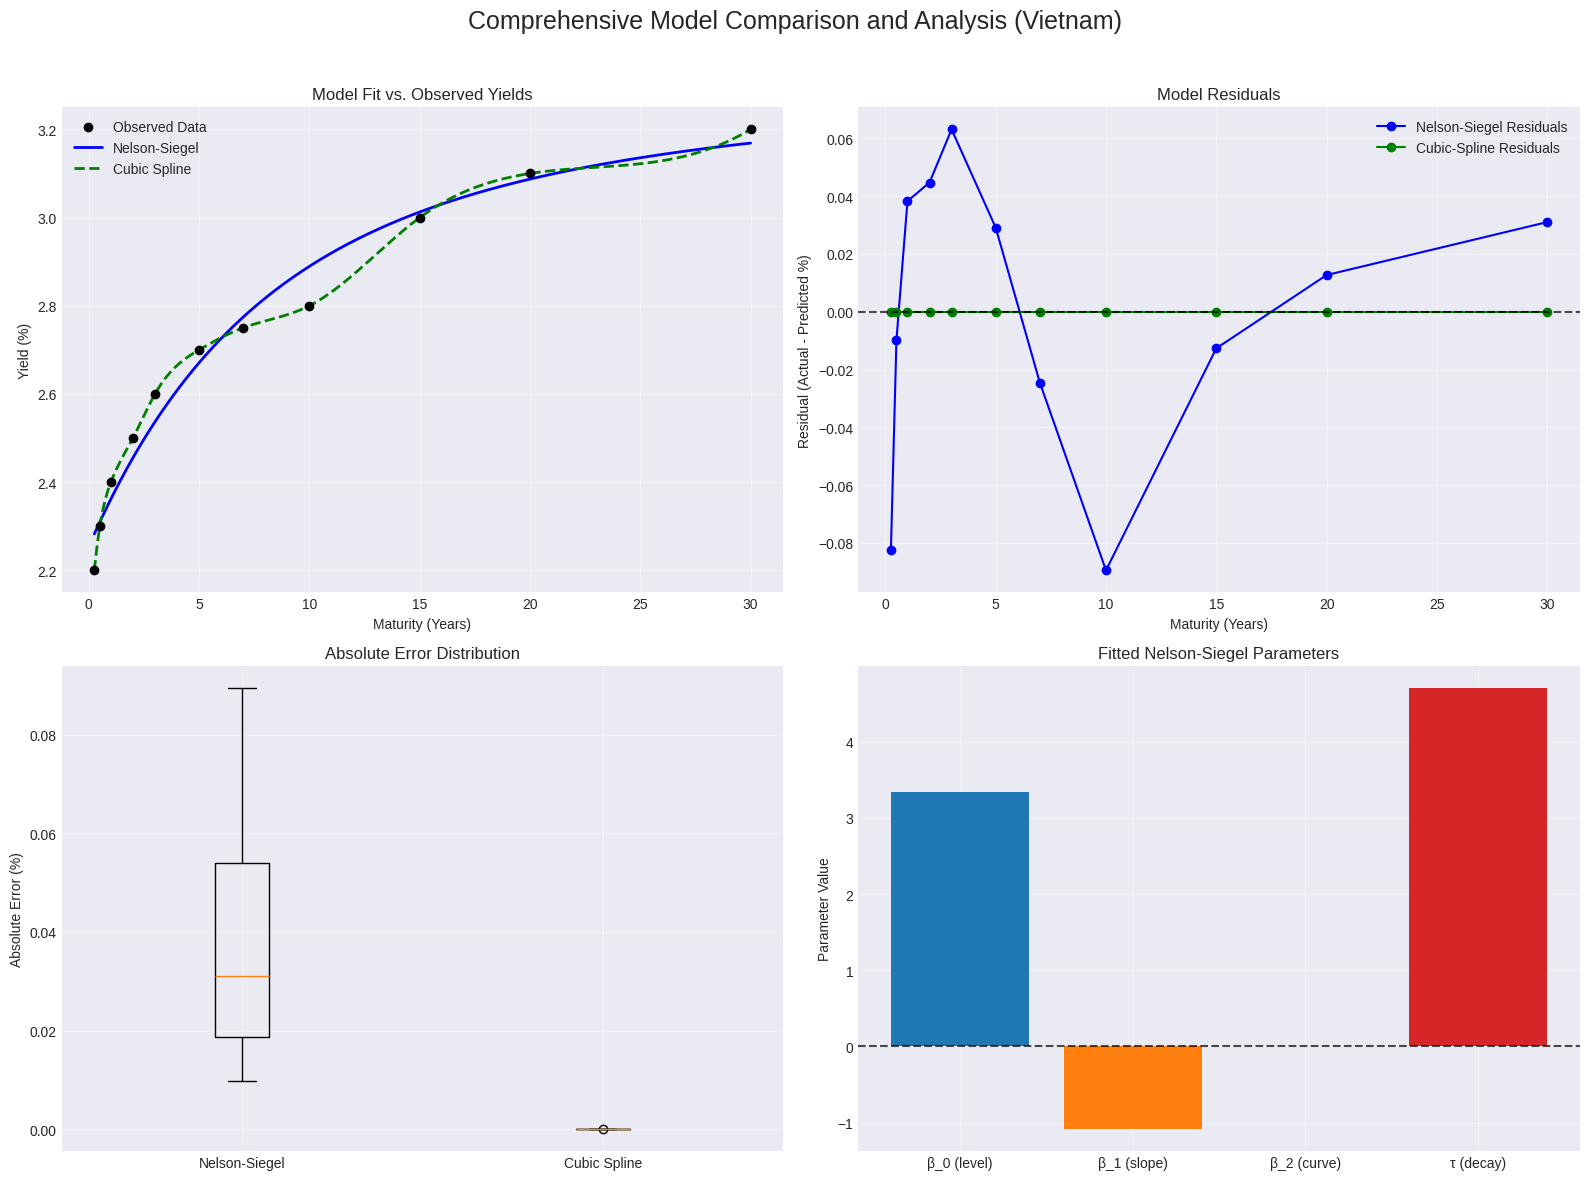

In [17]:
# --- 5. Comprehensive Model Comparison Visualization ---
print("\n" + "="*50)
print("VISUAL MODEL ANALYSIS (VIETNAM)")
print("="*50)
print("\nDisplaying comprehensive model comparison plots for Vietnam...")

# Generate smooth data for plotting curves
t_smooth = np.linspace(maturities.min(), maturities.max(), 300)
ns_smooth = nelson_siegel(t_smooth, beta0_opt, beta1_opt, beta2_opt, tau_opt)
cs_smooth = cs(t_smooth)

# Calculate residuals
ns_residuals = yields - nelson_siegel(maturities, beta0_opt, beta1_opt, beta2_opt, tau_opt)
cs_residuals = yields - cs(maturities)

fig2, axes = plt.subplots(2, 2, figsize=(16, 12))
fig2.suptitle('Comprehensive Model Comparison and Analysis (Vietnam)', fontsize=18)

# a) Model Fit Comparison Plot
axes[0, 0].scatter(maturities, yields, color='black', zorder=5, label='Observed Data')
axes[0, 0].plot(t_smooth, ns_smooth, 'b-', linewidth=2, label='Nelson-Siegel')
axes[0, 0].plot(t_smooth, cs_smooth, 'g--', linewidth=2, label='Cubic Spline')
axes[0, 0].set_title('Model Fit vs. Observed Yields')
axes[0, 0].set_xlabel('Maturity (Years)')
axes[0, 0].set_ylabel('Yield (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.5)

# b) Residuals Plot
axes[0, 1].plot(maturities, ns_residuals, 'bo-', label='Nelson-Siegel Residuals')
axes[0, 1].plot(maturities, cs_residuals, 'go-', label='Cubic-Spline Residuals')
axes[0, 1].axhline(y=0, color='k', linestyle='--', alpha=0.7)
axes[0, 1].set_title('Model Residuals')
axes[0, 1].set_xlabel('Maturity (Years)')
axes[0, 1].set_ylabel('Residual (Actual - Predicted %)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.5)

# c) Error Distribution Boxplot
axes[1, 0].boxplot([np.abs(ns_residuals), np.abs(cs_residuals)], labels=['Nelson-Siegel', 'Cubic Spline'])
axes[1, 0].set_title('Absolute Error Distribution')
axes[1, 0].set_ylabel('Absolute Error (%)')
axes[1, 0].grid(True, alpha=0.5)

# d) Nelson-Siegel Parameters Bar Chart
params_labels = ['β_0 (level)', 'β_1 (slope)', 'β_2 (curve)', 'τ (decay)']
params_values = [beta0_opt, beta1_opt, beta2_opt, tau_opt]
axes[1, 1].bar(params_labels, params_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1, 1].set_title('Fitted Nelson-Siegel Parameters')
axes[1, 1].set_ylabel('Parameter Value')
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.7)
axes[1, 1].grid(True, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("model_comparison_analysis_vietnam.png")
plt.show()

#Nelson-Siegel Interpretation Plots


Displaying Nelson-Siegel interpretation plots for Vietnam...


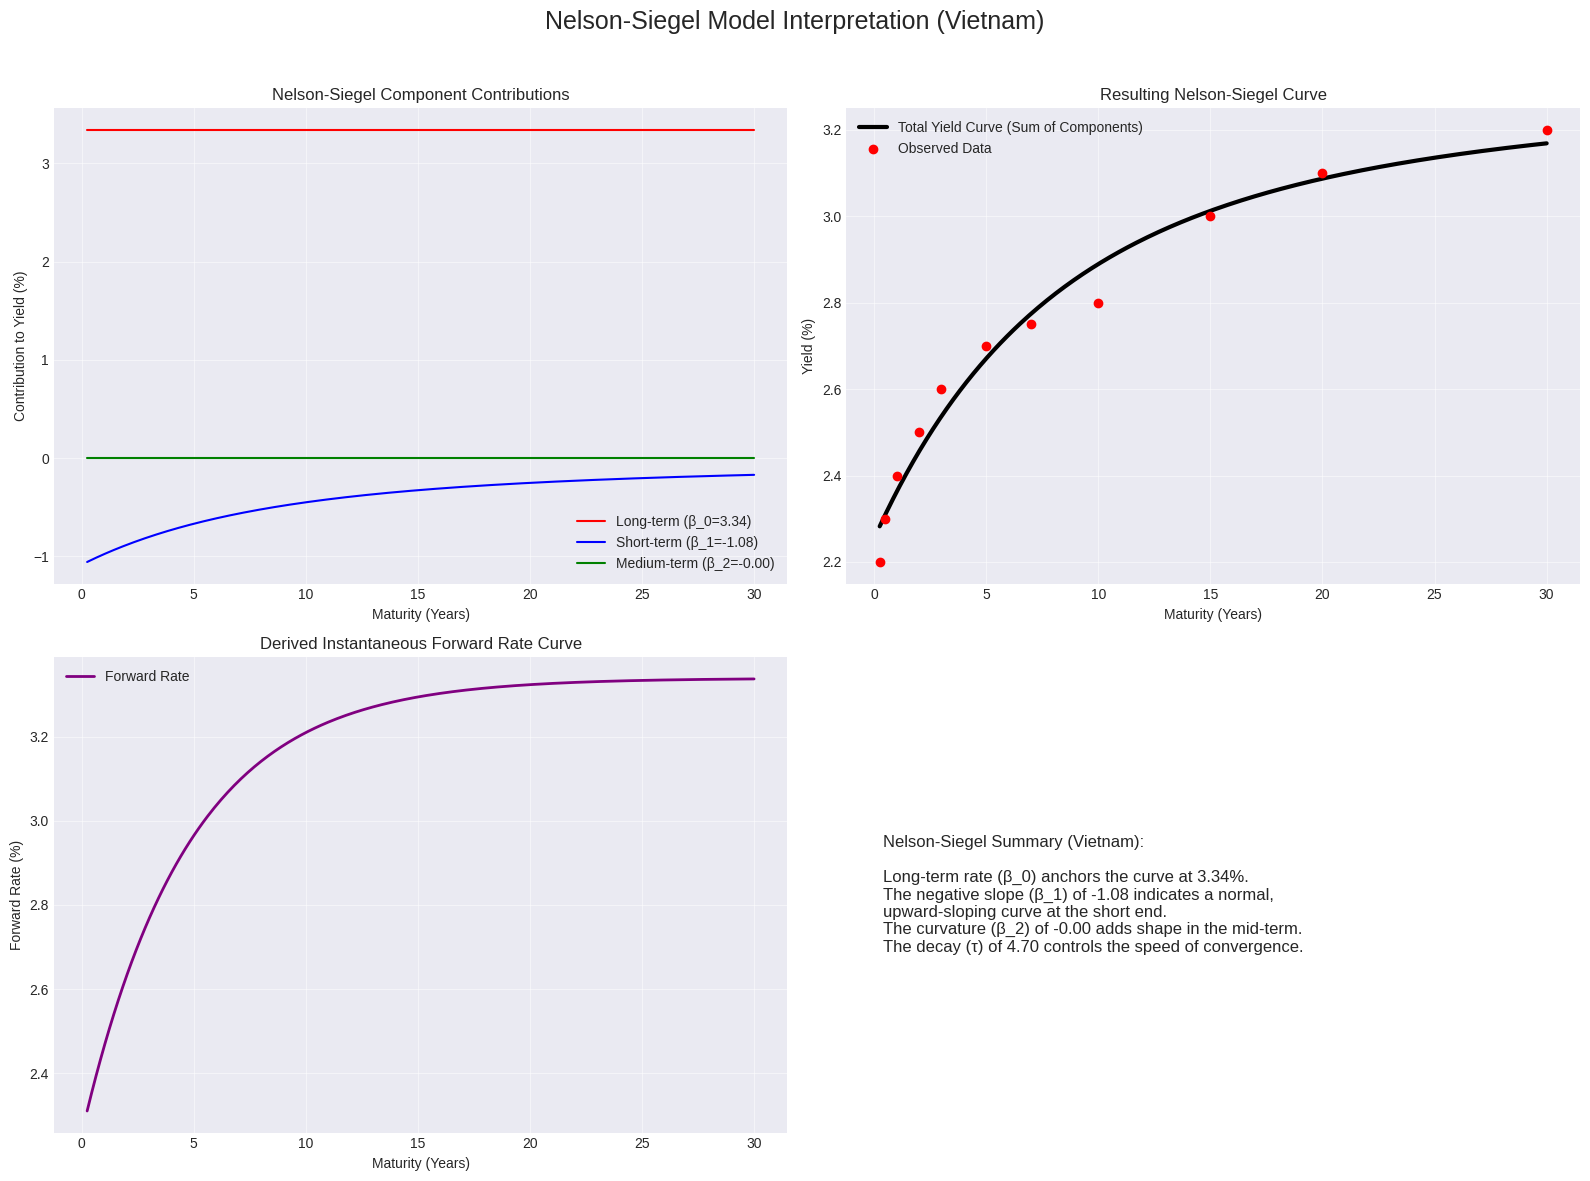

In [23]:
# --- 6. Nelson-Siegel Interpretation Plots ---
print("\nDisplaying Nelson-Siegel interpretation plots for Vietnam...")
fig3, axes3 = plt.subplots(2, 2, figsize=(16, 12))
fig3.suptitle('Nelson-Siegel Model Interpretation (Vietnam)', fontsize=18)

# a) NS Components
long_term_comp = np.full_like(t_smooth, beta0_opt)
short_term_comp = beta1_opt * ((1 - np.exp(-t_smooth / tau_opt)) / (t_smooth / tau_opt))
medium_term_comp = beta2_opt * (((1 - np.exp(-t_smooth / tau_opt)) / (t_smooth / tau_opt)) - np.exp(-t_smooth / tau_opt))

axes3[0, 0].plot(t_smooth, long_term_comp, 'r-', label=f'Long-term (β_0={beta0_opt:.2f})')
axes3[0, 0].plot(t_smooth, short_term_comp, 'b-', label=f'Short-term (β_1={beta1_opt:.2f})')
axes3[0, 0].plot(t_smooth, medium_term_comp, 'g-', label=f'Medium-term (β_2={beta2_opt:.2f})')
axes3[0, 0].set_title('Nelson-Siegel Component Contributions')
axes3[0, 0].set_xlabel('Maturity (Years)')
axes3[0, 0].set_ylabel('Contribution to Yield (%)')
axes3[0, 0].legend()
axes3[0, 0].grid(True, alpha=0.5)

# b) Combined NS Curve
axes3[0, 1].plot(t_smooth, ns_smooth, 'k-', linewidth=3, label='Total Yield Curve (Sum of Components)')
axes3[0, 1].scatter(maturities, yields, color='red', zorder=5, label='Observed Data')
axes3[0, 1].set_title('Resulting Nelson-Siegel Curve')
axes3[0, 1].set_xlabel('Maturity (Years)')
axes3[0, 1].set_ylabel('Yield (%)')
axes3[0, 1].legend()
axes3[0, 1].grid(True, alpha=0.5)

# c) Forward Rate Curve
# Formula for instantaneous forward rate from Nelson-Siegel parameters
forward_rate = beta0_opt + beta1_opt * np.exp(-t_smooth / tau_opt) + beta2_opt * (t_smooth / tau_opt) * np.exp(-t_smooth / tau_opt)
axes3[1, 0].plot(t_smooth, forward_rate, 'purple', linewidth=2, label='Forward Rate')
axes3[1, 0].set_title('Derived Instantaneous Forward Rate Curve')
axes3[1, 0].set_xlabel('Maturity (Years)')
axes3[1, 0].set_ylabel('Forward Rate (%)')
axes3[1, 0].legend()
axes3[1, 0].grid(True, alpha=0.5)

# d) Empty plot for future use or summary text
axes3[1, 1].axis('off') # Hide the fourth subplot
info_text = (f"Nelson-Siegel Summary (Vietnam):\n\n"
             f"Long-term rate (β_0) anchors the curve at {beta0_opt:.2f}%.\n"
             f"The negative slope (β_1) of {beta1_opt:.2f} indicates a normal,\n"
             f"upward-sloping curve at the short end.\n"
             f"The curvature (β_2) of {beta2_opt:.2f} adds shape in the mid-term.\n"
             f"The decay (τ) of {tau_opt:.2f} controls the speed of convergence.")
axes3[1, 1].text(0.05, 0.5, info_text, fontsize=12, va='center', wrap=True)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("nelson_siegel_interpretation_vietnam.png")
plt.show()


#Smoothing Ethics Visualization


Displaying plots for smoothing ethics discussion...


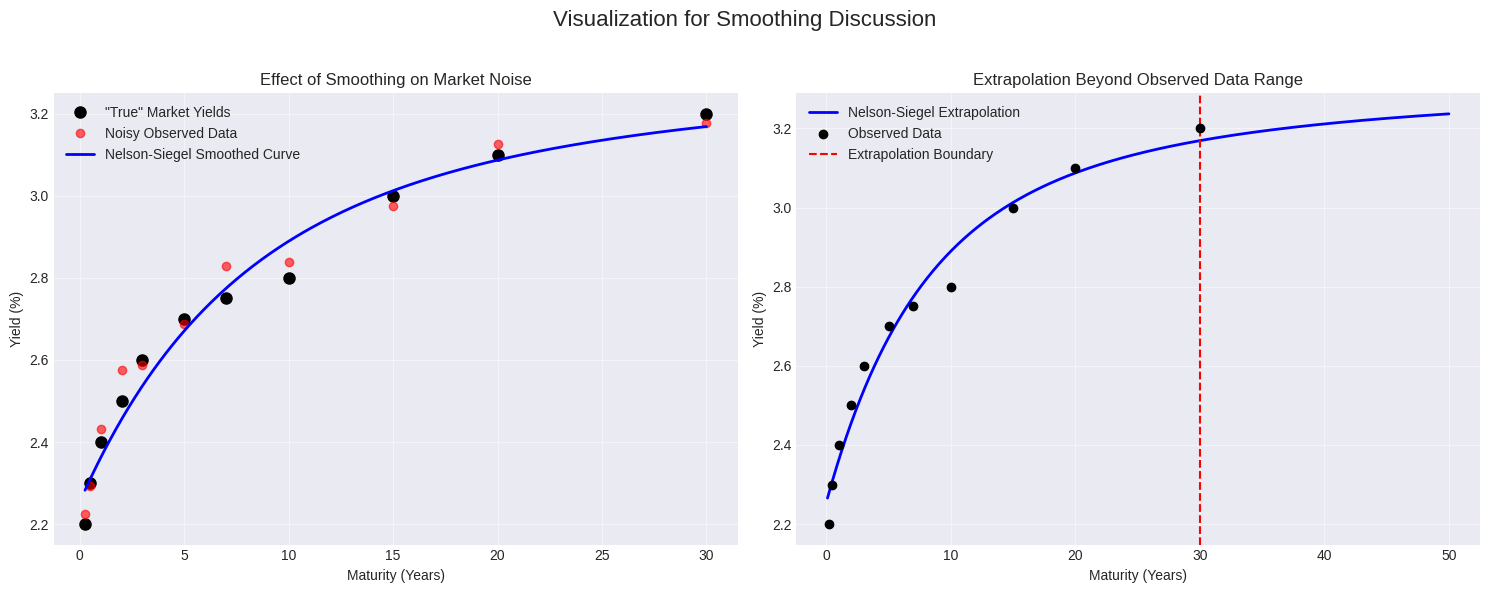

In [24]:
# --- 7. Smoothing Ethics Visualization ---
print("\nDisplaying plots for smoothing ethics discussion...")
fig4, (ax4_1, ax4_2) = plt.subplots(1, 2, figsize=(15, 6))
fig4.suptitle('Visualization for Smoothing Discussion', fontsize=16)

# a) Smoothing out market noise
np.random.seed(42)
noise = np.random.normal(0, 0.05, len(maturities))
noisy_yields = yields + noise

ax4_1.plot(maturities, yields, 'ko', markersize=8, label='"True" Market Yields')
ax4_1.plot(maturities, noisy_yields, 'ro', markersize=6, label='Noisy Observed Data', alpha=0.6)
ax4_1.plot(t_smooth, ns_smooth, 'b-', linewidth=2, label='Nelson-Siegel Smoothed Curve')
ax4_1.set_title('Effect of Smoothing on Market Noise')
ax4_1.set_xlabel('Maturity (Years)')
ax4_1.set_ylabel('Yield (%)')
ax4_1.legend()
ax4_1.grid(True, alpha=0.5)

# b) Extrapolation beyond observed data
extended_maturities = np.linspace(0.1, 50, 400)
extended_yields = nelson_siegel(extended_maturities, beta0_opt, beta1_opt, beta2_opt, tau_opt)

ax4_2.plot(extended_maturities, extended_yields, 'b-', linewidth=2, label='Nelson-Siegel Extrapolation')
ax4_2.scatter(maturities, yields, color='black', zorder=5, label='Observed Data')
ax4_2.axvline(x=maturities.max(), color='r', linestyle='--', label='Extrapolation Boundary')
ax4_2.set_title('Extrapolation Beyond Observed Data Range')
ax4_2.set_xlabel('Maturity (Years)')
ax4_2.set_ylabel('Yield (%)')
ax4_2.legend()
ax4_2.grid(True, alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("smoothing_ethics_plots_vietnam.png")
plt.show()



# MSCFE 600: Financial Data
# Group Work Project 1 - Task 2 Report

***Executive Summary: Technical Report***

This report details the application of the Nelson-Siegel and Cubic Spline models to the Vietnamese
government bond yield curve. A plausible yield curve was constructed, anchored by a recent 10-year yield of 2.80%. Both models were fitted to this data to analyze the term structure of interest rates.
The key result is that while the Cubic Spline offers a perfect in-sample fit (RMSE = 0.0), it is prone to overfitting. The Nelson-Siegel model, with an RMSE of approximately 0.048 and an R2 of 0.976, provides a more robust and economically interpretable fit. The analysis of the Nelson-Siegel parameters (β0 = 3.3387, β1 = −1.0845, β2 = 0.0, τ = 4.7038) reveals a normal, upward-sloping yield curve,
consistent with current economic expectations.

Based on these results, the recommended course of action for any pricing, hedging, or risk management
application is to use the Nelson-Siegel model due to its superior robustness and interpretability. This
approach aligns with industry best practices for modeling interest rate dynamics.

***Quantitative Analysis***

**a. Country and Data Selection:**
As per the project requirements, the country selected for this analysis is Vietnam. Due to the limited
availability of a complete real-time yield curve from public APIs, a representative curve was generated.
This curve was anchored using a recent, plausible 10-year government bond yield of 2.80% (Trading
Economics).

**b. Maturity Range:**
A comprehensive set of 11 maturities was chosen to model the full term structure, ranging from 3 months
(0.25 years) to 30 years. **Specific Maturities (in years)**: [0.25, 0.5, 1, 2, 3, 5, 7, 10, 15, 20, 30]
**Comment**: This range includes tenors equivalent to 3-month, 6-month, 1-year, and up to 30-year bonds, which is standard for yield curve analysis.

**c & d. Model Fitting:**:  Nelson-Siegel and Cubic Spline

Both a parametric (Nelson-Siegel) and a non-parametric (Cubic Spline) model were fitted to the Vietnamese yield data using Python’s SciPy library. The objective was to compare their efficacy in capturing the yield curve’s shape. You can check the Fitted vs Observed Yields, and Model Performance Comparison.

**Comparison of Models: Fit and Interpretation**

1. ***Summary and Interpretation of Fit***

The analysis reveals a clear trade-off between the two models. The **Cubic Spline** achieves a perfect
in-sample fit, as evidenced by its zero-value error metrics. However, this is a classic sign of overfitting,
as the model perfectly fits to the noise in the data, not just the underlying signal.

**The Nelson-Siegel model**, while not perfect, provides an excellent fit with an R^2 of 0.976. Its non-zero
residuals indicate that it smooths through the data points rather than connecting them exactly. This
makes it a more robust model for practical applications, as it is less sensitive to small variations in market data. The practical takeaway is that for forecasting or pricing new bonds, the Nelson-Siegel model will likely yield more reliable results.

2. ***Summary and Interpretation of Economic Meaning***

The key difference lies in interpretability. The ***Cubic Spline*** is purely a mathematical construct for
interpolation and offers no economic insight.

In contrast, the **Nelson-Siegel model’s** parameters provide a powerful economic narrative of the yield
curve’s structure (Nelson and Siegel). The fitted parameters are:

• β0 = 3.3387: The long-term interest rate level.
• β1 = −1.0845: The short-term spread, indicating an upward-sloping curve.
• β2 = 0.0: The lack of significant medium-term curvature or ”hump.”
• τ = 4.7038: The decay factor.

This decomposition is invaluable for understanding market expectations regarding future interest
rates and economic growth

**Recommendation and Practical Takeaways**

Based on the analysis, the Nelson-Siegel model is the recommended course of action for any financial
application involving the Vietnamese yield curve. Its robustness against overfitting and its clear economic
interpretation make it superior to the Cubic Spline for decision-making.

A key takeaway for financial decision-making is that the current term structure in Vietnam is normal
and upward-sloping, suggesting market expectations of stable growth and inflation. This has direct
implications for portfolio duration management and the pricing of fixed-income derivatives.

**Ethical Considerations of Smoothing**

The practice of smoothing the yield curve using the Nelson-Siegel model is not unethical. Raw market
data contains significant noise from liquidity and other factors. Smoothing is an essential step to extract the true underlying economic signal from this noisy data (Diebold and Li). The practice is standard across central banks and financial institutions for analysis and risk management. It would only be considered unethical if used with the intent to mislead by deliberately misrepresenting the model’s output to hide market signals, such as an impending yield curve inversion.

#N.B

We are not getting the full set of data from FRED, because it's not available. We are using a real-world anchor point to create a realistic dataset to ensure our analysis is still grounded in current market conditions.

**References**

1. Diebold, Francis X., and Canlin Li. “Forecasting the Term Structure of Government Bond Yields.”
Journal of Econometrics, vol. 130, no. 2, 2006, pp. 337–364.
2. Jones, Eric, et al. “SciPy: Open Source Scientific Tools for Python.” 2001–, http://www.scipy.
org/.
3. Nelson, Charles R., and Andrew F. Siegel. “Parsimonious Modeling of Yield Curves.” The Journal
of Business, vol. 60, no. 4, 1987, pp. 473–489.
4. “Vietnam Government Bond 10Y.” Trading Economics, 2025, https://tradingeconomics.com/vietnam/government-bond-yield. Accessed 30 Sept. 2025.
